# Bayesian Linear Regression

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

## Setup

Generate some data to work with.

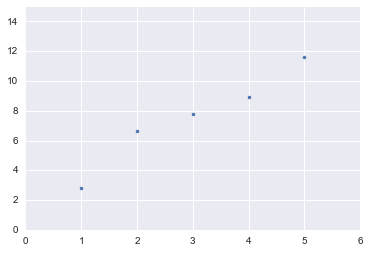

In [3]:
w = [1, 2]
x = np.arange(1,6)
y = w[0] + w[1]*x + np.random.randn(len(x))

# design matrix
X = np.vstack((np.ones(len(x)), x)).T

plt.plot(x, y, '.')
plt.xlim(0,6)
plt.ylim(0, 15)
plt.show()

## MCMC Simulations

In [10]:
# log likelihood for observed data given parameters, w.
def log_likelihood(w):
    return(sum(norm.logpdf(y - np.dot(X, w))))

# chain_length: number of samples
# burnin:       number of initial steps to be discarded
# log_phi:      function that is evaluated for each state,
#               which returns the logarithm of the unnormalized density of the state
# w0:           initial state
def metropolis(chain_length, burnin, log_phi, w0):
    w = w0
    chain = np.zeros([chain_length, 2])
    chain[0,:] = w0

    for i in range(1, chain_length + burnin):
        w_prime = w + np.random.randn(len(w)) * .2
        if np.random.rand() < np.exp(log_phi(w_prime) - log_phi(w)):
            w = w_prime
        
        if i >= burnin:
            chain[i-burnin,:] = w
    
    return(chain)

## Results

Now that we have implemented the Metropolis algorithm, we can obtain some samples from the posterior distribution of the parameters.

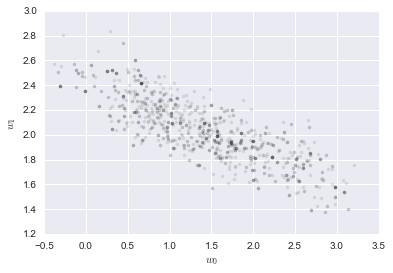

In [27]:
n_sim = int(1e3)
n_burnin = int(1e2)

chain = metropolis(n_sim, n_burnin, log_likelihood, [-1, -1])

plt.plot(chain[:,0], chain[:,1], 'k.', alpha = .1)
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.show()

## Marginal distributions of each parameter

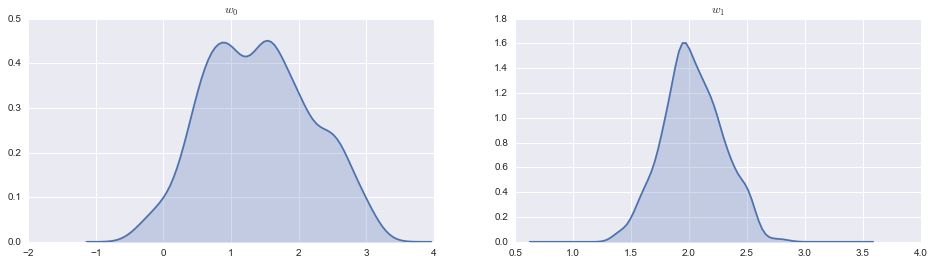

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

sns.kdeplot(chain[:,0], shade=True, ax = ax[0])
ax[0].set_title("$w_0$")

sns.kdeplot(chain[:,1], shade=True, ax = ax[1])
ax[1].set_title("$w_1$")

plt.show()

## Sampled regression fits

Each point in the parameter space corresponds to a regression fit, which is a line in this particular case.

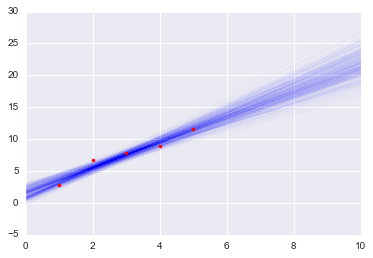

In [29]:
xs = np.linspace(0, 10, 101)
for i in range(n_burnin, chain.shape[0]):
    w = chain[i,:]
    ys = w[0] + w[1]*xs
    plt.plot(xs, ys, 'b-', alpha = 5e-3)

plt.plot(x, y, 'r.')
    
plt.show()

## Prediction

We can now proceed to compute some predictions using the samples we have obtained. We will let each sample to make its own prediction for any given $x$, and then plot a density estimation for all predictions.

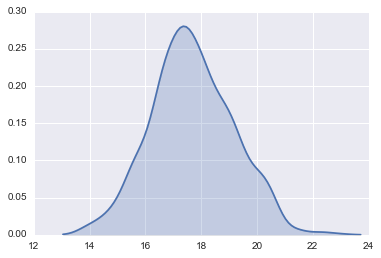

In [33]:
x_new = 8
sns.kdeplot(chain[:,0] + chain[:,1]*x_new, shade = True)
plt.show()

As it can be seen from the plot, uncertainty in the estimate for $x=8$ is rather large as expected, due to the fact that we had only $5$ datapoints. If we had large number of datapoints to start with, the uncertainty would be much narrower.